 ## CUSTOMER SEGMENTATION

The company now wants to boost its business by focusing on different strategies for different customer groups. Hence, it is important to divide customers into specific groups based on certain factors. The task is to find those factors and categorize customers into specific groups

Information about columns in the data file:
* **InvoiceNo**: Invoice Id
* **StockCode**: Ids of purchased items
* **Description**: Description of the item
* **Quantity**: Quantity of the purchased item.
* **InvoiceDate**: Date of purchase
* **UnitPrice**: Price of the item
* **CustomerID**: Id of the customer who made a purchase
* **Country**: Customer's country name

## Customer Segmentation:

Customer segmentation is the process of dividing a company's customers into different groups or segments based on different customer attributes. The process of customer segmentation is based on finding differences between customer behavior or characteristics.

The main goals and benefits of customer segmentation:

* **Increasing revenue:** This is the most obvious goal of any customer segmentation task
* **Understanding customers:** One of the business models that is increasingly popular is “know your customer - KYC”, segmenting customers will help a lot for this model.
* **Marketing:** The most obvious benefit of customer segmentation is the ability to effectively focus marketing efforts. If a company knows the different segments of its customer base, it can come up with better marketing campaigns tailored specifically for that segment. A good segmentation model allows for a better understanding of customer requirements and thus increases the chances of success of any marketing campaign developed by the organization.

* **Place the Right Product** A good customer segmentation strategy can also help a company develop or offer new products, or a group of products together as a form of offering combine.
* **Find potential customer segments:** Find customer segments that may be missing to identify untapped customer segments by focusing on marketing campaigns or business development new.

## Some terms and methods will be used in the ASM lesson

#### 1. Clustering:
The most obvious method to perform customer segmentation is to use unsupervised Machine Learning methods like clustering. The simplest method is to collect as much data about the customer as possible in the form of features or attributes and then find the different clusters that can be obtained from that data. Finally, we can find out the characteristics of customer segments by analyzing the characteristics of the clusters.

#### 2.Exploratory Data Analysis - EDA

EDA is another way to find customer segments. This is usually done by analysts with good domain knowledge regarding both the product and the customer. It can be implemented flexibly when making decisions in an analysis.

#### 3. RFM model represents customer value:

Since our dataset is limited to sales history and does not include anonymized information about customers, we will use an RFM-based model. The RFM model takes a customer's transactions and computes three important information properties about each customer:
* **Recency**: The value of how recently a customer made a purchase
* **Frequency**: Frequency of customer transactions
* **Monetary value**: The amount (or pounds in ASM post) of all the transactions that the customer has made

# 1. Import packages and data

In [39]:
#data cleaning
import numpy as np
import pandas as pd
import datetime
import math

#datavisualization
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import plotly as py
import plotly.graph_objs as go

sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

#datapreprocessing + clustering
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from scipy.stats import skew, norm, probplot, boxcox

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

QQ_plot to examine distriution:

In [40]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [41]:
df = pd.read_csv("Online Retail.csv")

In [42]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 2. Data Examinations

In [43]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Looking at the description above, we can see that the **Quantity** and **UnitPrice** columns have negative values, which is not reasonable unless there will be return transactions. make these two columns negative. Our target is product segmentation so we will need to remove these values (just care about the customers who buy, the customers who return, we don't care about).

In [44]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [45]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [46]:
df[(df['Quantity'] < 0) & (df['UnitPrice'] == 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [47]:
df[(df['Quantity'] == 0) & (df['UnitPrice'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


With a negative or zero unit price, CustomerID is Null Values which means that there are no customers in transactions but rather the reasons for lost goods, debt repayment, etc.

Percentage of trade that has negative quantity value:

In [48]:
(df[df['Quantity'] < 0].shape[0]/df.shape[0])*100

1.9604767590130447

All transactions with negative quantity start with the letter C.

## 3. Data preparation

Once we've created our customer value dataset, we'll do some preprocessing of the data. In this case, we will use the K-means clustering algorithm. One of the requirements for the algorithm to work properly is to normalize the value of the feature variables. The mean centering of a value is the replacement of the actual value of the variable with a normalized value, so that the variable has a mean of 0 and a variance of 1. This ensures that all variables lie within the mean. in the same range.

In data with variables Price or price, often these variables have very large values. To solve this problem, we will transform all the variables on the log scale. This transformation, along with normalization, will ensure that the input to the algorithm is a set of values with the same range.

An important point about the data preprocessing step is that sometimes we need it to be reversible. In this ASM field, we will have the clustering result of the log transformed data. But in order to map back to the original data, we will need to reverse-convert all the variables so that we get back the actual RFM (Recency, Frequency, Monetary) figures. This can be done using Python functions.

* Delete all rows where CustomerID is null
* Delete all rows with Quantity < 0
* Get rows with UnitPrice > 0

In [49]:
cs_df = df.dropna(subset="CustomerID", axis=0)
cs_df = cs_df[cs_df['Quantity'] >= 0]
cs_df = cs_df[cs_df['UnitPrice'] > 0]
cs_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [50]:
cs_df.InvoiceDate = pd.to_datetime(cs_df.InvoiceDate)
cs_df['amount'] = cs_df.Quantity*cs_df.UnitPrice
cs_df.CustomerID = cs_df.CustomerID.astype('Int64')
cs_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### ** Create a Recency variable and print the description of the newly created recency variable**

As in the introduction we mentioned the RFM model, now we are going to create the Recency variable, we need to decide the reference date for the analysis. Usually, we will use the last trading day plus one day. Then, we will construct the recency variable which is the number of days before the reference date when the customer last purchased.

For example: The last day that a customer's purchase order appears is the 10th day so they will take 10 + 1 = 11. Then we will subtract the last day from which each customer purchases from 11. Assuming the last time that customer A made a purchase was on day 5, and the last time that customer B made a purchase was on day 7, we would have a Recency for customer A which would be 11 - 5 = 6, and a Recency for customer B is 11 - 7 = 4

In [51]:
#max date by customer
customer_history_df = cs_df.groupby(by='CustomerID')[['InvoiceDate']].max()

#most recent date
customer_history_df['recent_date'] = customer_history_df['InvoiceDate'].dt.date.max()

#recency creation
customer_history_df['recency'] = customer_history_df['recent_date'] - customer_history_df['InvoiceDate'].dt.date

#convert to only date
customer_history_df['recency'] = customer_history_df['recency'].dt.days + 1
customer_history_df.drop(columns=['InvoiceDate','recent_date'],inplace=True)
customer_history_df

,recency
CustomerID,
12346,326
12347,3
12348,76
12349,19
12350,311
...,...
18280,278
18281,181
18282,8


In [52]:
customer_history_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
recency,4338.0,93.059474,100.012264,1.0,18.0,51.0,142.75,374.0


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


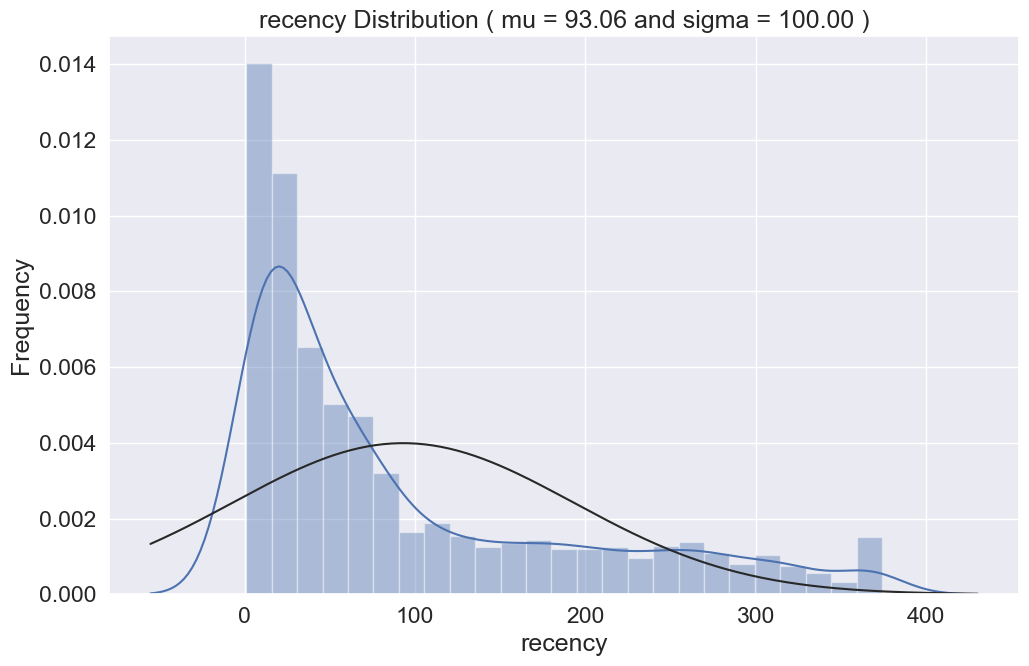

In [53]:
QQ_plot(customer_history_df, measure='recency')

From the graph above, we can see that the distribution of Recency is skewed, with a peak on the left and a long tail on the right. It deviates from the normal distribution and tends to be positive.

In [54]:
customer_history_df['frequency'] = cs_df.groupby('CustomerID').aggregate({'InvoiceNo': 'nunique'})

In [55]:
customer_history_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
recency,4338.0,93.059474,100.012264,1.0,18.0,51.0,142.75,374.0
frequency,4338.0,4.272015,7.697998,1.0,1.0,2.0,5.00,209.0


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


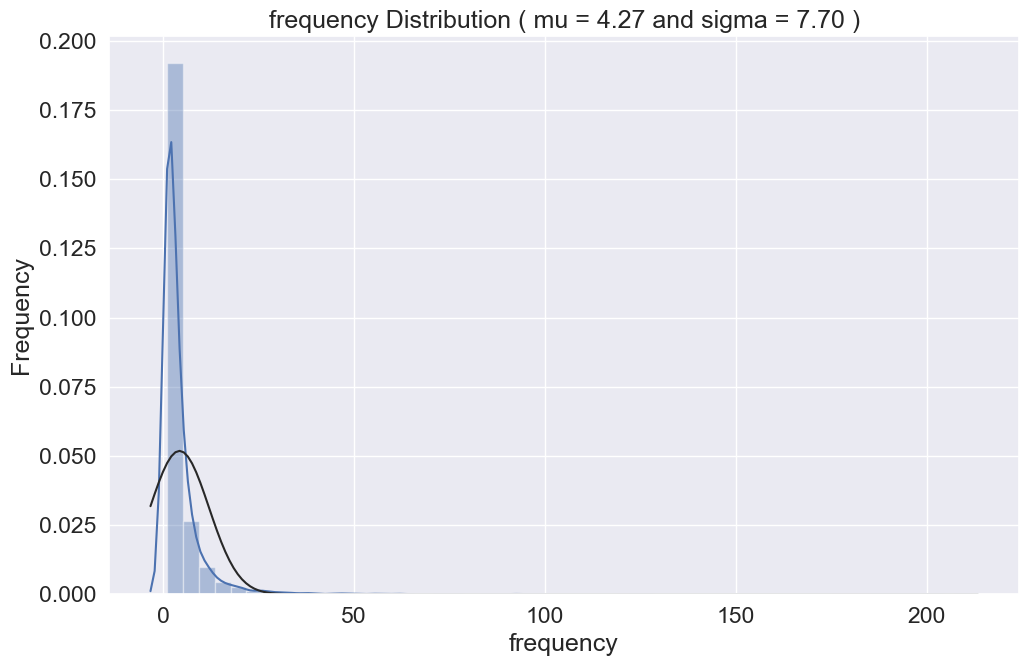

In [56]:
QQ_plot(customer_history_df[['frequency']], 'frequency')

From the chart above, we can see that the sales frequency distribution is skewed, with a peak on the left and a long tail on the right. It deviates from the normal distribution and tends to be positive.

To calculate the Monetary Value, we will calculate the sum amount grouped by CustomerID

In [57]:
customer_history_df['amount'] = cs_df.groupby('CustomerID').agg({'amount':'sum'})
customer_history_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
recency,4338.0,93.059474,100.012264,1.00,18.000,51.000,142.75,374.00
frequency,4338.0,4.272015,7.697998,1.00,1.000,2.000,5.00,209.00
amount,4338.0,2054.266460,8989.230441,3.75,307.415,674.485,1661.74,280206.02


In [58]:
customer_history_df.frequency.mean()

4.272014753342554

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


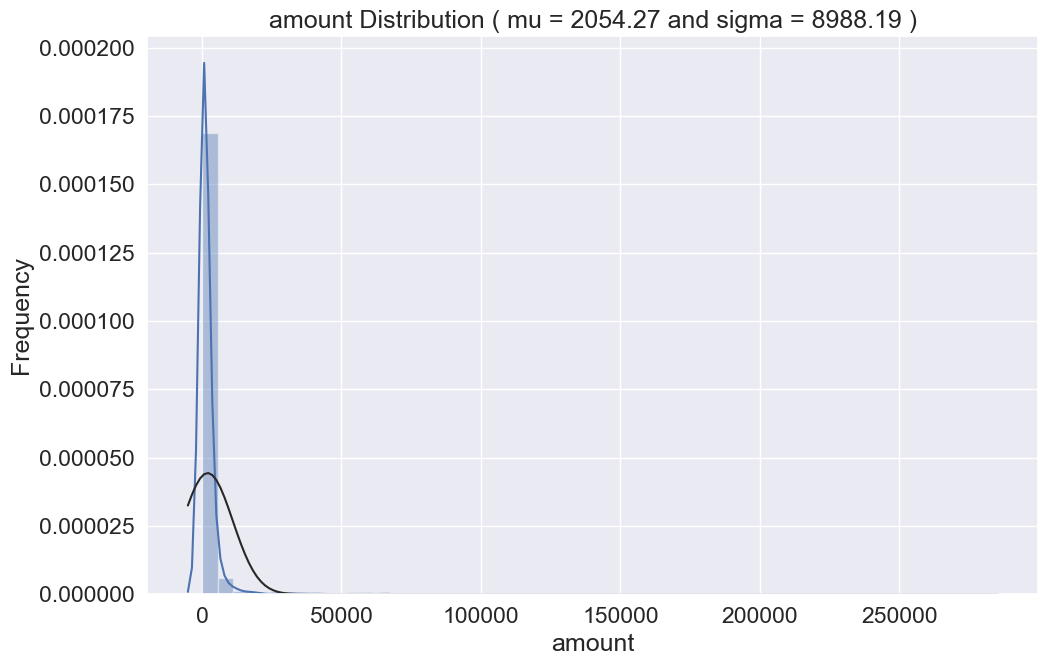

In [59]:
QQ_plot(customer_history_df[['amount']],'amount')

From the graph above, we can see that the Monetary Value distribution is skewed, with a peak on the left and a long tail on the right. It deviates from the normal distribution and tends to be positive.

#### **New Data Summary**

In [60]:
customer_history_df.reset_index(inplace=True)
customer_history_df.describe()

,CustomerID,recency,frequency,amount
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,93.059474,4.272015,2054.266460
std,1721.808492,100.012264,7.697998,8989.230441
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,1.000000,307.415000
50%,15299.500000,51.000000,2.000000,674.485000
75%,16778.750000,142.750000,5.000000,1661.740000
max,18287.000000,374.000000,209.000000,280206.020000


#### **Scale RBM on log scale then normalize with StandardScaler**

In [61]:
#log transformation
customer_history_df['amount_log'] = customer_history_df['amount'].apply(lambda x: math.log(x))
customer_history_df['recency_log'] = customer_history_df['recency'].apply(lambda x: math.log(x))
customer_history_df['frequency_log'] = customer_history_df['frequency'].apply(lambda x: math.log(x))

#StandardScaler application to normalize data
scaler = StandardScaler()

customer_history_df['amount_log'] = scaler.fit_transform(customer_history_df[['amount_log']])
customer_history_df['recency_log'] = scaler.fit_transform(customer_history_df[['recency_log']])
customer_history_df['frequency_log'] = scaler.fit_transform(customer_history_df[['frequency_log']])

#data summary
customer_history_df[['amount_log','recency_log','frequency_log']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount_log,4338.0,-8.022628e-16,1.000115,-4.179280,-0.684183,-0.060942,0.654244,4.721395
recency_log,4338.0,-2.147146e-16,1.000115,-2.747497,-0.658264,0.094524,0.838502,1.534703
frequency_log,4338.0,-2.355833e-16,1.000115,-1.048610,-1.048610,-0.279044,0.738267,4.882714


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='amount_log', ylabel='Density'>

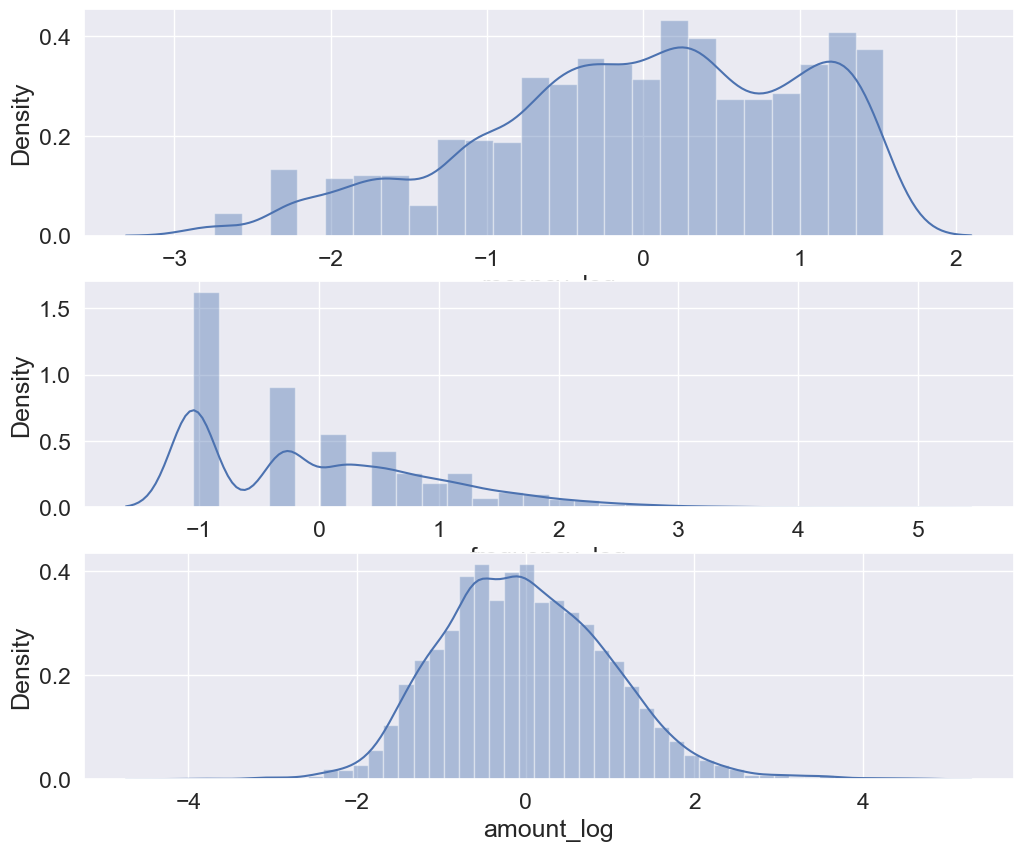

In [62]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1)
sns.distplot(customer_history_df['recency_log'])
plt.subplot(3, 1, 2)
sns.distplot(customer_history_df['frequency_log'])
plt.subplot(3, 1, 3)
sns.distplot(customer_history_df['amount_log'])

## Regression Plot visualization

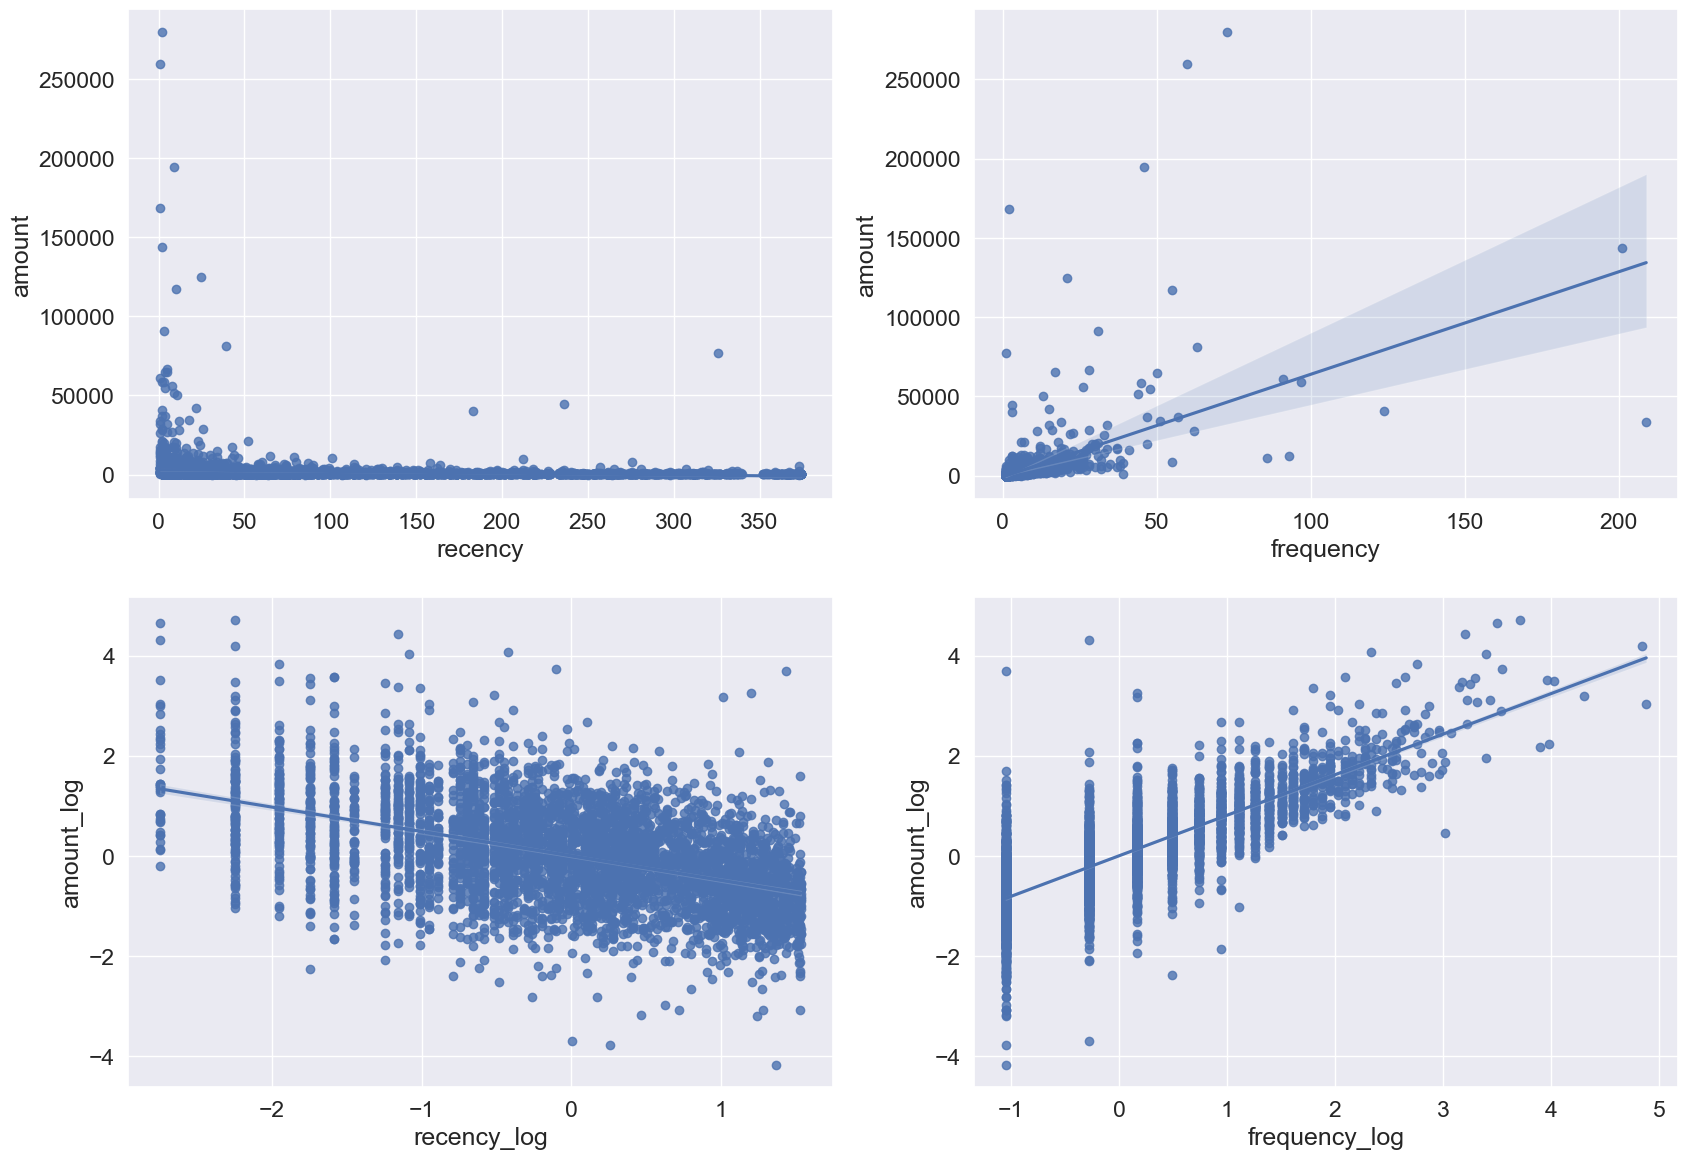

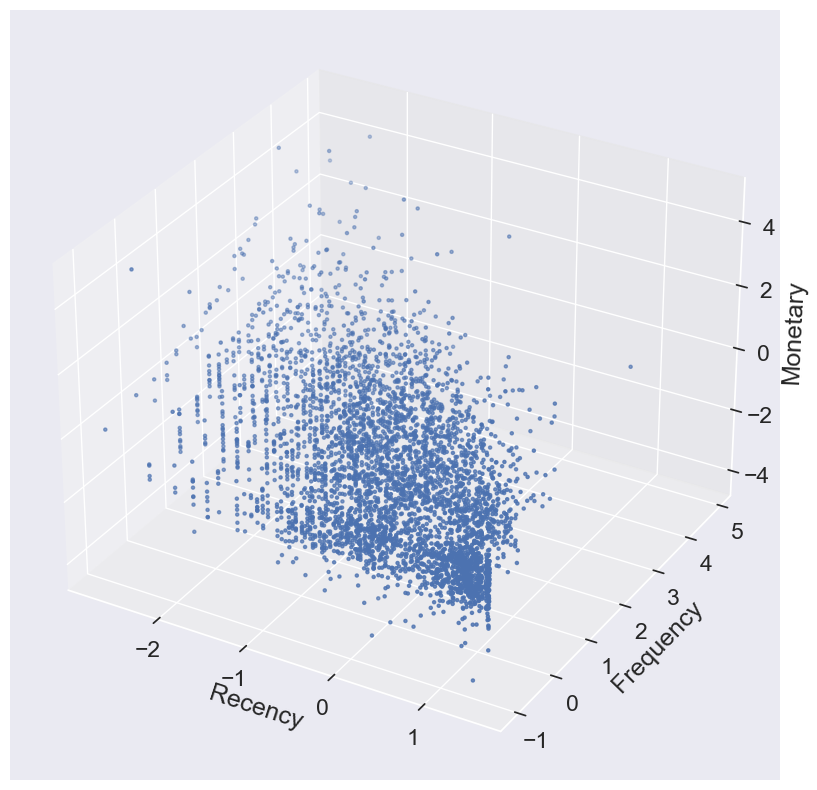

In [63]:
#reg suplot
fig = plt.figure(figsize=(20,14))
f1 = fig.add_subplot(221); sns.regplot(x='recency', y='amount', data=customer_history_df)
f1 = fig.add_subplot(222); sns.regplot(x='frequency', y='amount', data=customer_history_df)
f1 = fig.add_subplot(223); sns.regplot(x='recency_log', y='amount_log', data=customer_history_df)
f1 = fig.add_subplot(224); sns.regplot(x='frequency_log', y='amount_log', data=customer_history_df)

#3d visualization
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

#plot axis
xs =customer_history_df.recency_log
ys = customer_history_df.frequency_log
zs = customer_history_df.amount_log
ax.scatter(xs, ys, zs, s=5)

#set axis
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

#display
plt.show()

We can see from the graphs above that people who shop with higher frequency (frequency) and more recently visit (recency ) tend to spend more (Monetary value) based on increasing trends. increase of amount with increasing and decreasing trends for Frequency and Recent Hits respectively. .

1) 
+ The relationship between the amount of purchases (amount/Monentary Value) and the recent traffic (recency) is an exponential relationship, that is, the number of rows over time increases exponentially, which proves even more. reasonable business processes, stimulating revenue growth.
+ At the same time, the increase or the exponent of the purchase volume (amount_log) and the increase / exponent of the traffic (recency_log) have a relatively linear relationship, which proves the same thing.

2) 
+ The volume of traffic (frequency) and the quantity of goods purchased (amount/Monentary value) both increase linearly, which means there is no sudden increase in the increase in the class of customers who buy retail/medium/in bulk (penguin). , dolphins, whales) which is steadily increasing in customer classes.

# Modeling - Kmean

#### **Elbow Method:**

Use the Elbow method to find the optimal number of clusters. The idea behind the elbow method is to determine the value of k at which the bend begins to increase fastest. If k increases, the distortion of the clusters will decrease, because the samples will be close to the cluster centroid.

This method considers the percentage of variance explained as a function of the number of clusters. More precisely, if we plot the percentage of variance explained by the clusters against the number of clusters, the first clusters will add a lot of information (which explains more of the variance), but at some point, marginal gain will decrease (Number of clusters increases, variance decreases), creating an angle in the graph, which will be the point of quantity selection for clusters, hence the "elbow criterion". The percentage of variance is explained as the ratio of the group variance to the total variance, also known as the F-test. A slight variation of this method plots the curvature of variance in the cluster

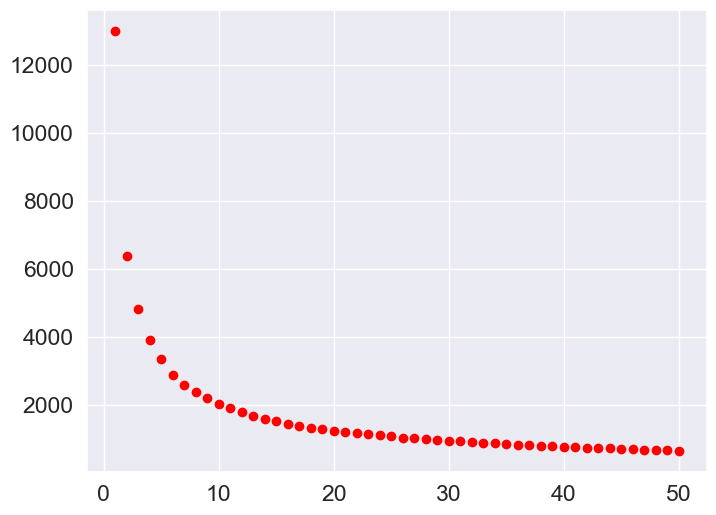

The best K sugest:  7


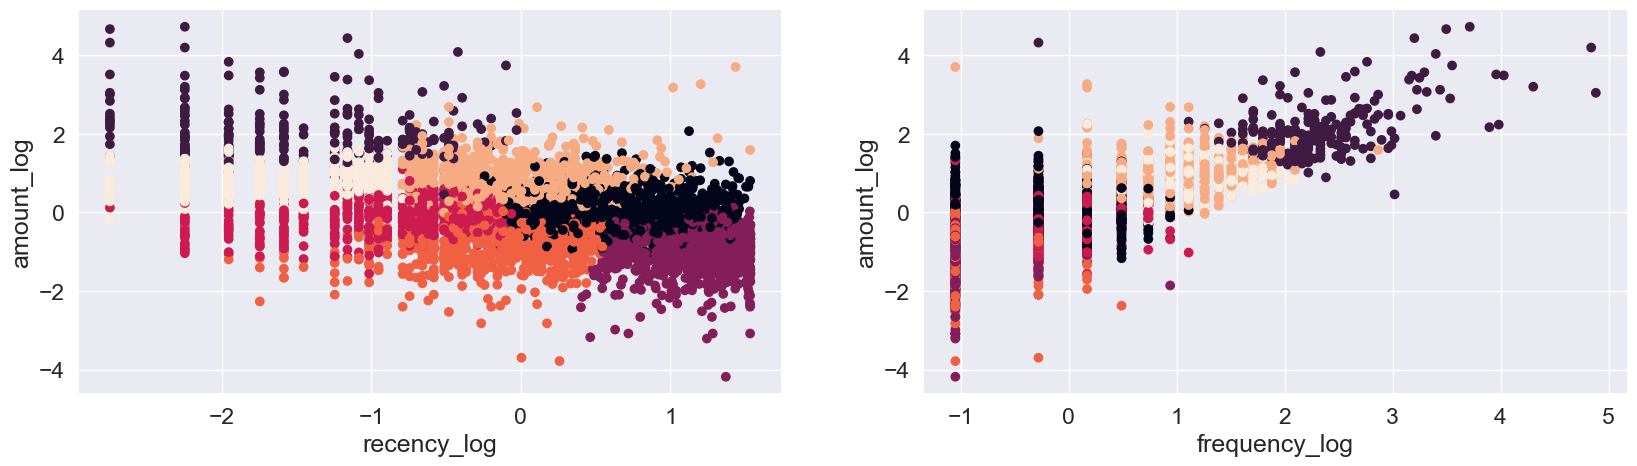

In [64]:
#scale data
X_scaled = customer_history_df[['amount_log','recency_log','frequency_log']]

#int vars
cl = 50
corte = 0.1
feature_vector = ['amount_log','recency_log','frequency_log']
anterior = 100000000000000
cost = [] 
K_best = cl

#loop over incremental clustering numbers
for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k, 
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    #fit model
    model = model.fit(X_scaled)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

#plot
plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

# Create a kmeans model with the best K.
print('The best K sugest: ',K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(X_scaled)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = model.labels_

# And we'll visualize it:
#plt.scatter(X_scaled.iloc[:,0], X_scaled.iloc[:,1], c=model.labels_.astype(float))
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = X_scaled.iloc[:,1], y = X_scaled.iloc[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[0])
ax = fig.add_subplot(122)
plt.scatter(x = X_scaled.iloc[:,2], y = X_scaled.iloc[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[2])
ax.set_ylabel(feature_vector[0])

plt.show()

When using the Elbow method starting with K of 3, we observe that for k = 7, the cluster variance reduction is strongest with 10%. From this feature, we will start to evaluate more deeply with k from 3 to 7. We will use Silhouette analysis method.

**Silhouette index: **

**Silhouette** analysis in Kmeans . clustering

Silhouette analysis can be used to study the distance between clusters, as a strategy to quantify the quality of clustering or clustering through visualizations to graph the degree of "group closeness". " of samples in clusters. Silhouette diagrams display a measure of how close each point in a cluster is to points in neighboring clusters and thus provide a way to visually evaluate parameters such as the number of clusters.

This analysis can also be applied to other clustering algorithms besides k-means.

The Silhouette coefficient has a range of [-1, 1], and is calculated by:
1. a(i) is the mean distance between sample x(i) and all other points in the same cluster.
2. b(i) from the next closest cluster is the average distance between sample x(i) and all samples in the nearest cluster.
3. s(i) is the difference between a(i) and b(i) divided by max(a(i), b(i)), as shown here:

\begin{align}
\text{s(i)} = \frac{b(i) - a(i)}{max\{a(i), b(i)\}}
\end{align}

Another way of writing the above formula:

\begin{align}
         \text{s}(i) = \left\{
         \begin{array}{cl}
         1 - a(i)/b(i), & \text{if } a(i) < b(i) \\
         0, & \text{if } a(i) = b(i) \\
         b(i)/a(i) - 1, & \text{if } a(i) > b(i)
         \end{array}
         \right.
     \end{align}

In there:
* If close to +1, it means that the sample is far from neighboring clusters.
* A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
* If most of the objects have high values, then the clustering configuration is appropriate.
* If many points have low or negative values, the clustering configuration may have too many or too few clusters.
* A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters
* Negative values indicate that those samples may have been assigned to the wrong group.

K is considered bad when clusters have below-average Silhouette scores or there is large variation in the size of Silhouette cells. K is considered good when all cells have similar or not much different thickness, or in other words all cells have similar dimensions.

Although we must be aware that in some cases and situations we may sometimes have to discard the mathematical interpretation given by the algorithm and consider the business relevance of the result obtained.

Let's see how our data behaves for each of the K values (3, 5 and 7) in the Silhouette score of each cluster, along with the centroid of each cluster highlighted in the scatter plots, they We will cluster with 3 input variables amount_log, recency_log, frequency_log but will display on scatter in pairs (amount_log, recency_log) and (amount_log, frequency_log)

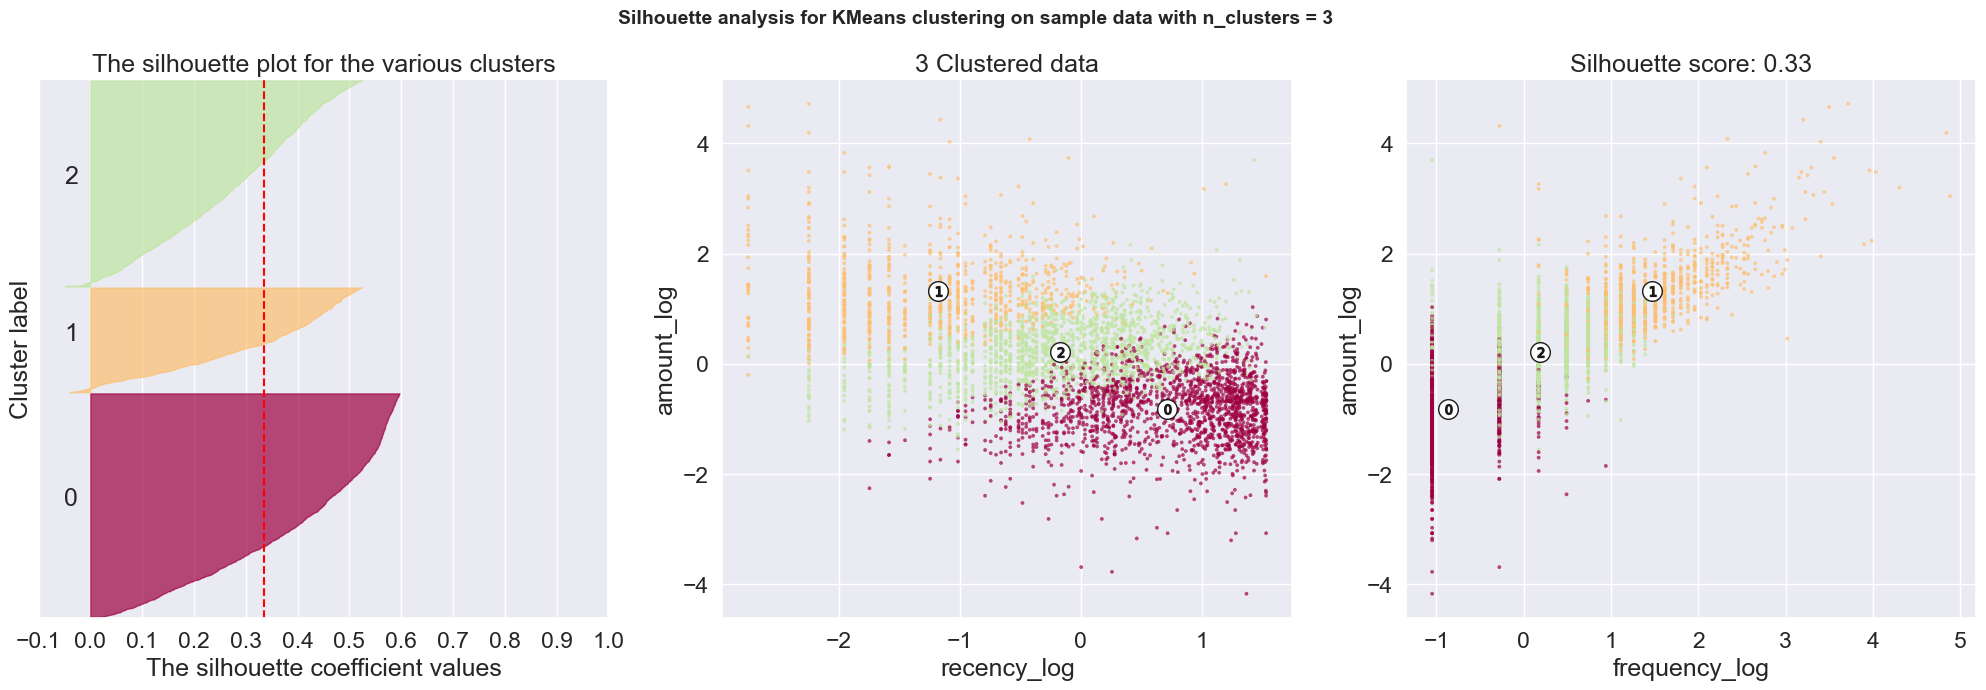

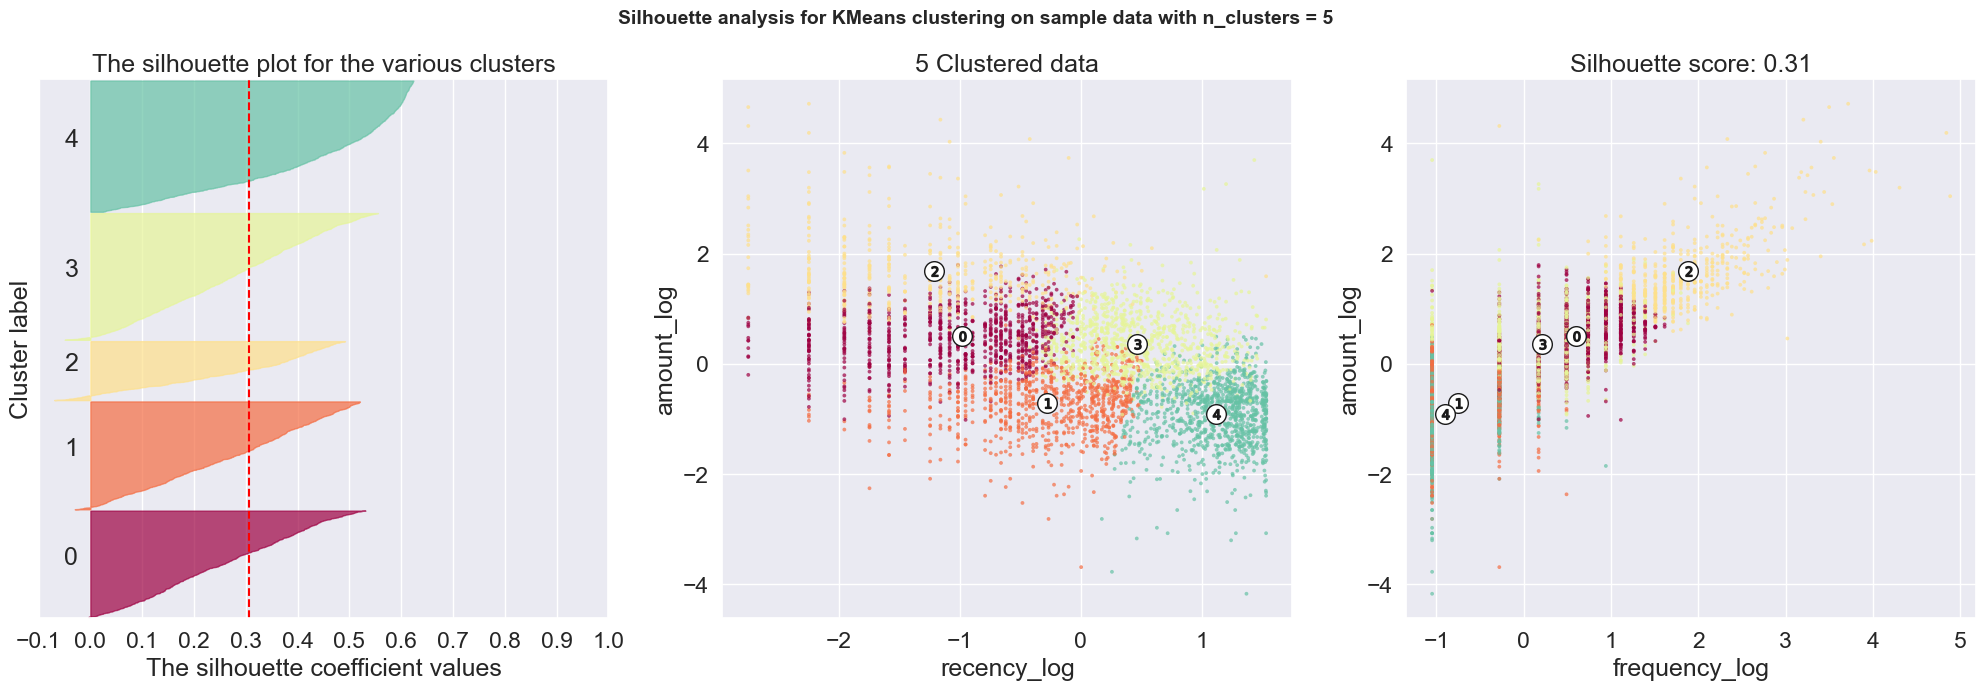

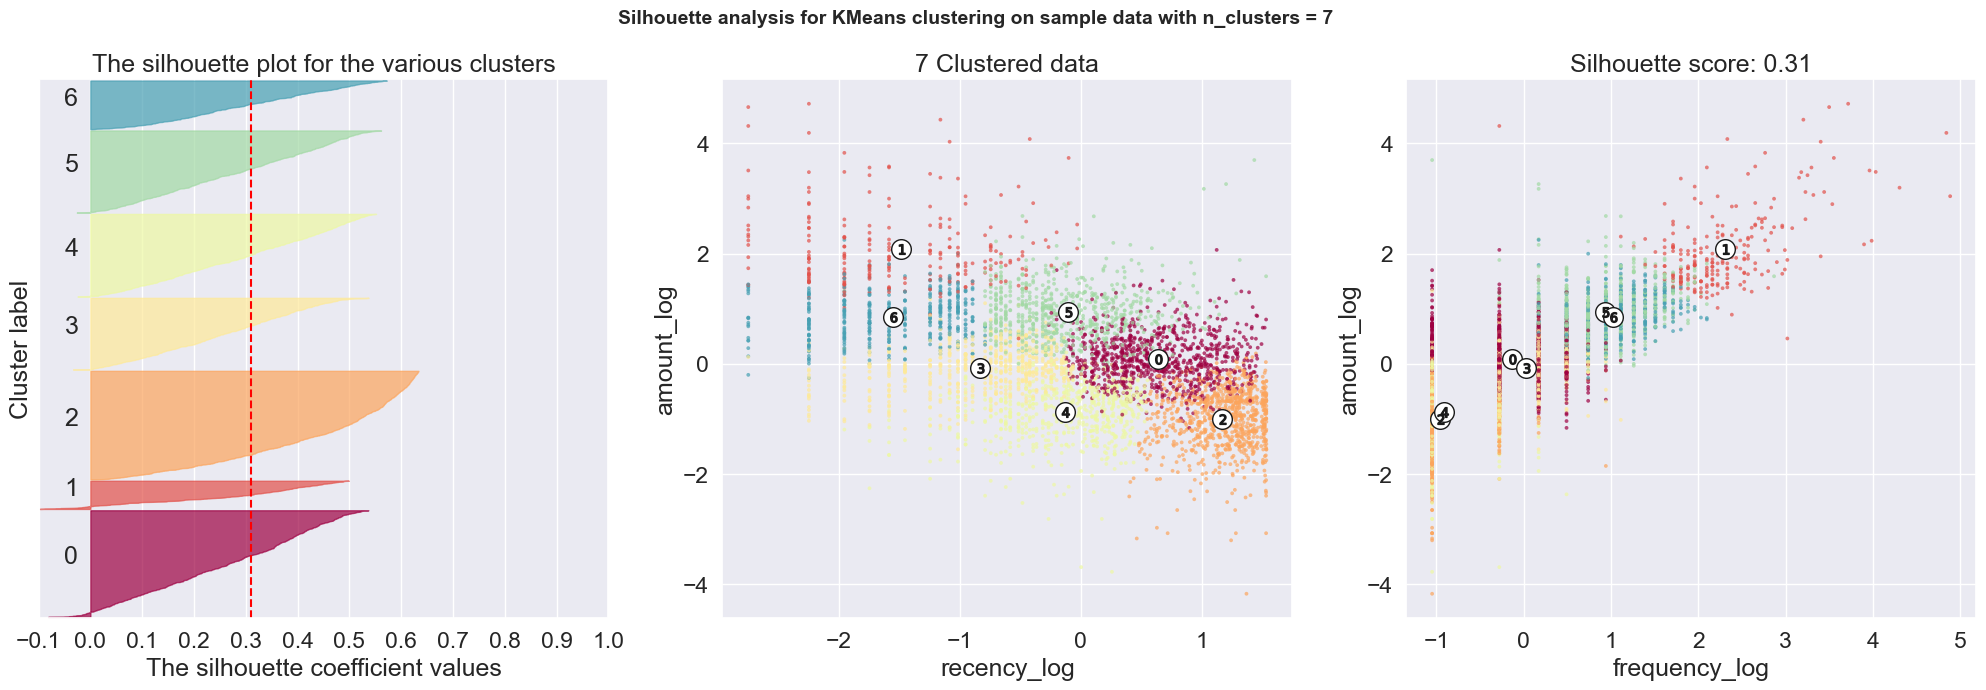

In [65]:
#dict for cluster centers
cluster_centers = dict()

#loop through incremental number of clusters
for n_clusters in range(3,K_best+2,2):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])
    
    #int clusters
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)
    
    #silhoutte vars
    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })
    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10
    
    #loop over clusters to check silhouette vars
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    #title
    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    
    #visualize centers + value points
    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(X_scaled.iloc[:, x], X_scaled.iloc[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(feature_vector[x])
    ax2.set_ylabel(feature_vector[y])

    x = 2
    ax3.scatter(X_scaled.iloc[:, x], X_scaled.iloc[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    
    #centers
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(feature_vector[x])
    ax3.set_ylabel(feature_vector[y])
    
    #subtitle
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    
    #dispay
    plt.show()

    1) The silhouettte coefficient increases with increasing the number of clusters from 3 to 5, which means that the values of the clusters are better and clearer when separating into 3 clusters instead of 5 clusters
     2) The silhouette coefficient stays the same when the number of clusters is increased from 5 to 7 which means that the matches of the clusters are equal when separating 3 and 5 clusters.
     3) The silhouette coefficient reaches min between clusters 5 and 7.

##  Clusters Center

In [66]:
#features
features = ['amount',  'recency',  'frequency']

#loop over incremental clusters
for i in range(3,K_best+2,2):
    print("for {} clusters the silhouette score is {:1.2f}".format(i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=features))
    print('-'*50)

for 3 clusters the silhouette score is 0.33
Centers of each cluster:
     amount   recency  frequency
0  1.230439  4.885672   1.183876
1  8.465506  0.888745   9.656872
2  3.122965  2.198921   3.045718
--------------------------------------------------
for 5 clusters the silhouette score is 0.31
Centers of each cluster:
      amount   recency  frequency
0   4.014263  1.060532   4.392100
1   1.345084  2.008749   1.308466
2  11.790249  0.865444  13.958896
3   3.548413  3.913860   3.092261
4   1.129445  7.026822   1.136971
--------------------------------------------------
for 7 clusters the silhouette score is 0.31
Centers of each cluster:
      amount   recency  frequency
0   2.788337  4.565178   2.280582
1  16.837604  0.676081  20.512343
2   1.043736  7.390126   1.085443
3   2.396469  1.214504   2.637260
4   1.161530  2.295100   1.130847
5   5.995884  2.346367   5.952321
6   5.527525  0.637146   6.463536
--------------------------------------------------


# 5. Clusters Insights

With plots and centers in exact units, let's take a look at some clustering insights:

* In case there are 3 clusters:
* In case there are 5 clusters:
* In case there are 7 clusters:

    Deep dive into clusters:
    To go deeper into the characteristics of the clusters and find out the quality of the differences between the clusters, we can label our data with the corresponding cluster label and then visualize the features to find the differences. distinctive.

In [67]:
#assigning clusters labels to each data points
for i in range(3,8,2):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    customer_history_df['clusters_{}'.format(i)] = kmeans.labels_
    
#display
customer_history_df.head()

,CustomerID,recency,frequency,amount,amount_log,recency_log,frequency_log,clusters_3,clusters_5,clusters_7
0,12346,326,1,77183.60,3.698719,1.435416,-1.048610,2,1,4
1,12347,3,7,4310.00,1.410201,-1.953393,1.111836,1,3,1
2,12348,76,4,1797.24,0.716419,0.382865,0.490522,2,1,4
3,12349,19,1,1757.55,0.698706,-0.619183,-1.048610,2,2,5
4,12350,311,1,334.40,-0.617446,1.401368,-1.048610,0,0,0


In [68]:
#3 clusters
c3_0 = customer_history_df[customer_history_df['clusters_3'] == 0]
c3_1 = customer_history_df[customer_history_df['clusters_3'] == 1]
c3_2 = customer_history_df[customer_history_df['clusters_3'] == 2]

#5 clusters
c5_0 = customer_history_df[customer_history_df['clusters_5'] == 0]
c5_1 = customer_history_df[customer_history_df['clusters_5'] == 1]
c5_2 = customer_history_df[customer_history_df['clusters_5'] == 2]
c5_3 = customer_history_df[customer_history_df['clusters_5'] == 3]
c5_4 = customer_history_df[customer_history_df['clusters_5'] == 4]

#7 clusters
c7_0 = customer_history_df[customer_history_df['clusters_7'] == 0]
c7_1 = customer_history_df[customer_history_df['clusters_7'] == 1]
c7_2 = customer_history_df[customer_history_df['clusters_7'] == 2]
c7_3 = customer_history_df[customer_history_df['clusters_7'] == 3]
c7_4 = customer_history_df[customer_history_df['clusters_7'] == 4]
c7_5 = customer_history_df[customer_history_df['clusters_7'] == 5]
c7_6 = customer_history_df[customer_history_df['clusters_7'] == 6]

## 3 Clusters analysis:

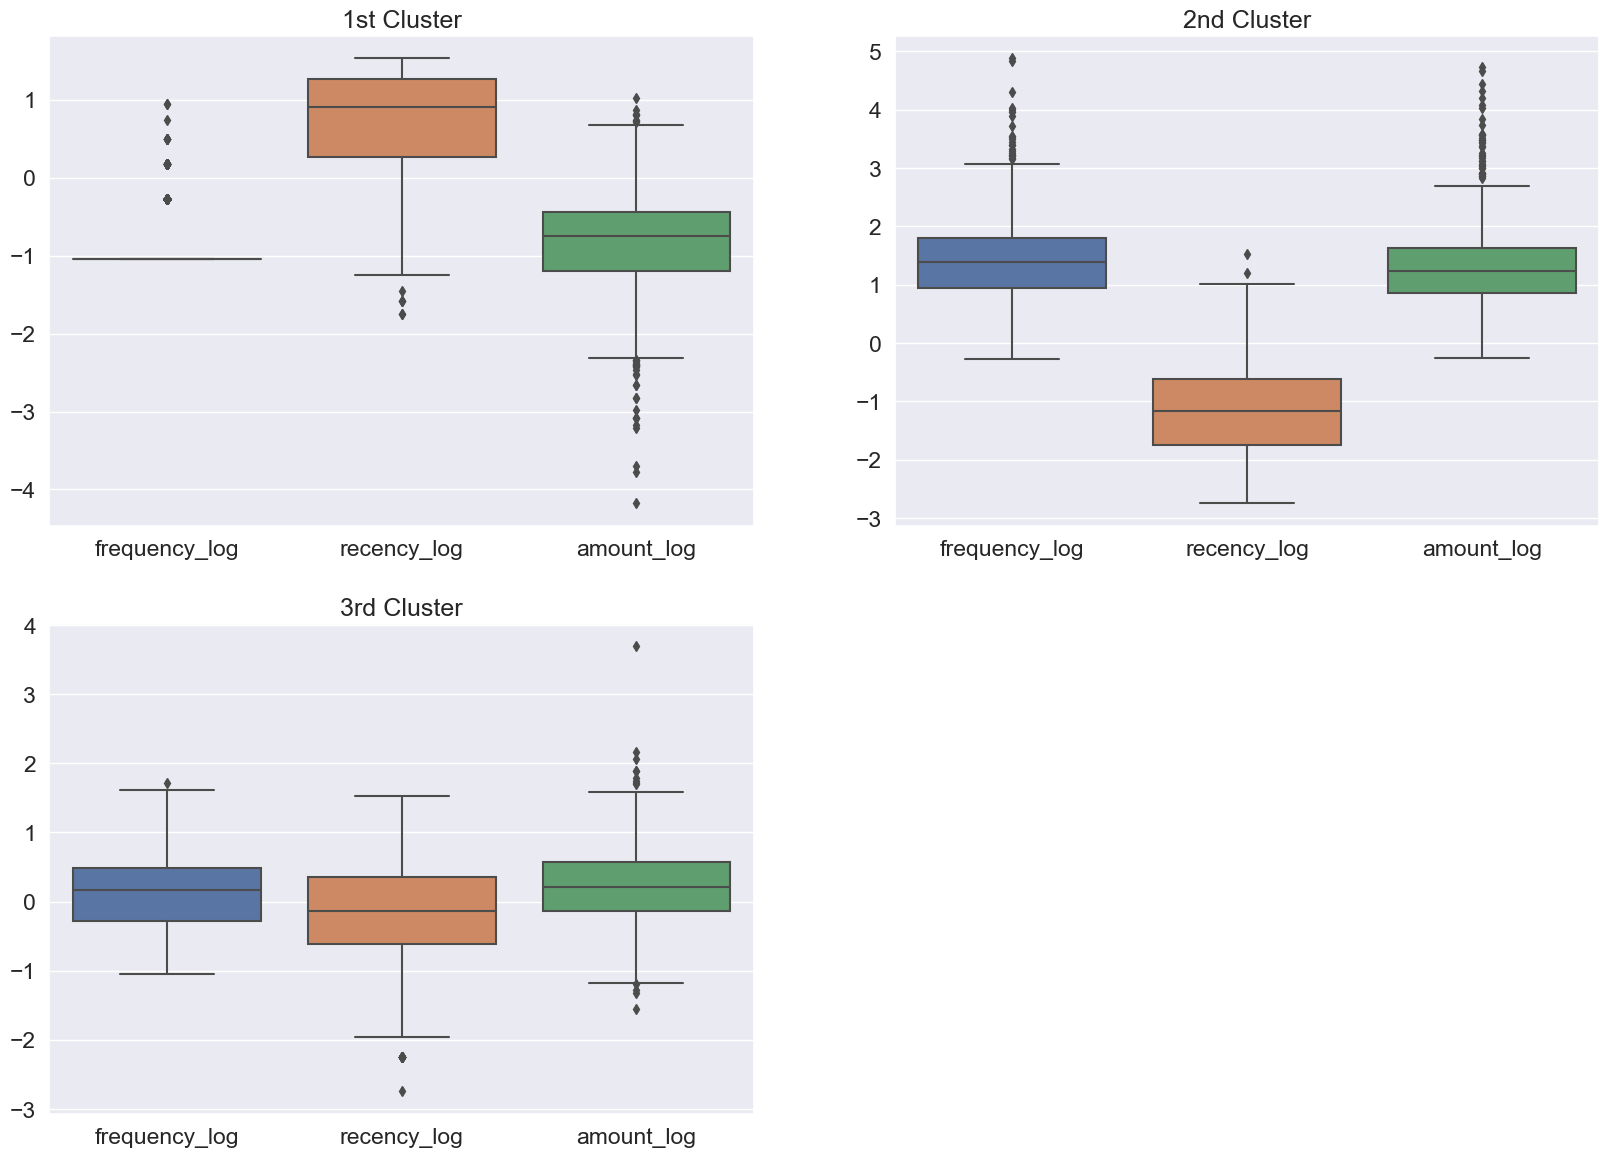

In [69]:
# 3 clusters
fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(221); sns.boxplot(data=c3_0[['frequency_log','recency_log','amount_log']])
ax2 = fig.add_subplot(222); sns.boxplot(data=c3_1[['frequency_log','recency_log','amount_log']])
ax3 = fig.add_subplot(223); sns.boxplot(data=c3_2[['frequency_log','recency_log','amount_log']])

#add title
ax1.title.set_text("1st Cluster")
ax2.title.set_text("2nd Cluster")
ax3.title.set_text("3rd Cluster")

#display
plt.show()

When dividing 3 clusters, the most obvious difference is in the recency coefficient, cluster 1 has a relatively low recency coefficient compared to the remaining clusters and cluster 2 has a high coefficient, in cluster 3 has a similar recency coefficient. for average. This proves that in cluster 1 is a new customer cluster, cluster 2 is an old customer cluster, and in cluster 3 is a middle customer cluster. (This is further reinforced when the recency_log coefficient has quite a few outliers on the three graphs above).

Of the 3 clusters, cluster 1 has the highest frequency coefficient, which proves that the new customer cluster has a higher frequency of purchasing than in the previous clusters. At the same time, there are more outliers appearing in the frequency and amount coefficients in cluster 1 compared to the rest of the clusters, showing that the new customer group has a lot of whales (customers buy goods with a much larger quantity and pay than other groups). remaining customers).

Cluster 2 has a relatively large number of outliers in amount, indicating that old customers have many dolphins customers (customers who buy goods in small quantities and pay relatively modestly compared to the rest).

In the last cluster, we see a relatively even outlier distribution between cluster 3 and cluster 2 and based on the above two things we can understand that the company has moved from attracting dolphins in the past to new ones. client whales in the present.

# 5 clusters analysis:

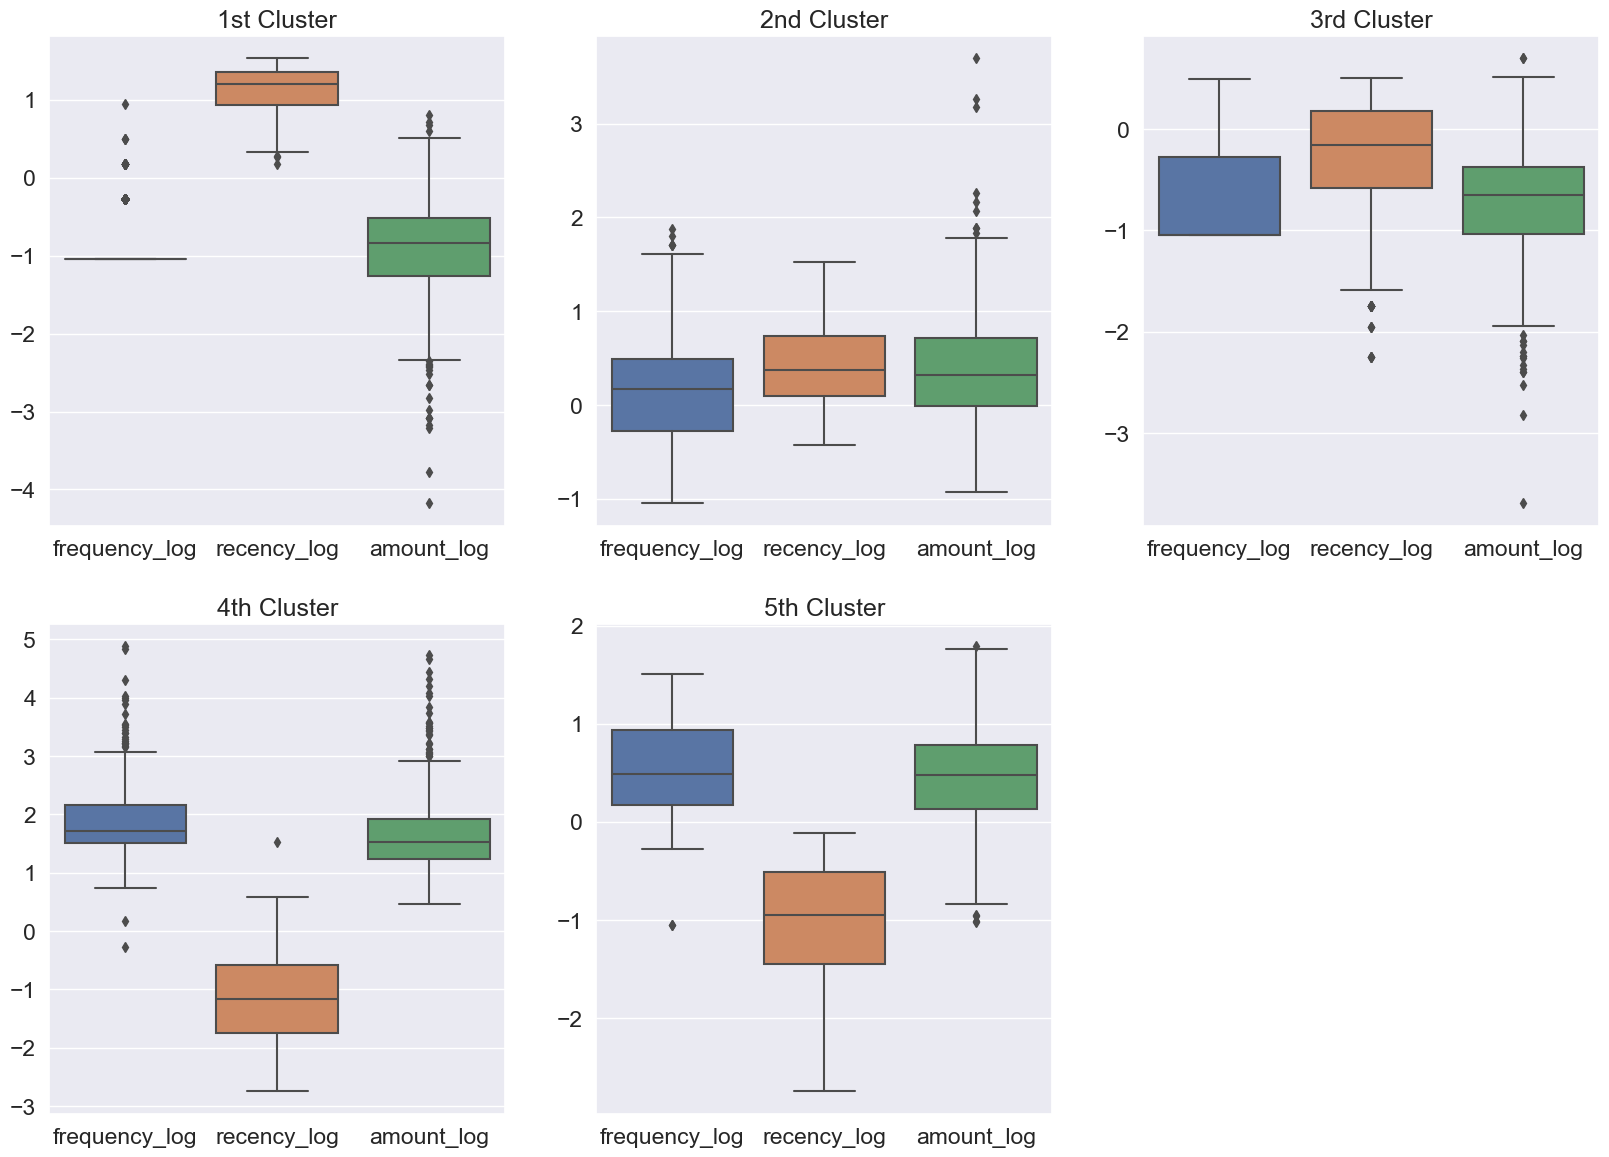

In [70]:
# 5 clusters
fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(231); sns.boxplot(data=c5_0[['frequency_log','recency_log','amount_log']])
ax2 = fig.add_subplot(232); sns.boxplot(data=c5_1[['frequency_log','recency_log','amount_log']])
ax3 = fig.add_subplot(233); sns.boxplot(data=c5_2[['frequency_log','recency_log','amount_log']])
ax4 = fig.add_subplot(234); sns.boxplot(data=c5_3[['frequency_log','recency_log','amount_log']])
ax5 = fig.add_subplot(235); sns.boxplot(data=c5_4[['frequency_log','recency_log','amount_log']])

#add title
ax1.title.set_text("1st Cluster")
ax2.title.set_text("2nd Cluster")
ax3.title.set_text("3rd Cluster")
ax4.title.set_text("4th Cluster")
ax5.title.set_text("5th Cluster")

#display
plt.show()

Cluster 5 has much more diversity than cluster 3 above, the clusters differ not only in recency but also in frequency and amount, proving that the characteristics in each group are more special and different.

We see in the first cluster, the amount of frequency_log is -1, a specific value, this cluster can represent customers who have only purchased once. It is quite remarkable that recency in this cluster is relatively higher than in other clusters, proving that our argument above is correct: the old customers are pretty much dolphins customers (the number of outliers below the amount index also reinforces it. add this argument).

Cluster 3 has the lowest number of recency but the highest frequency and amount of the clusters, and the above outliers also exist quite a lot in this cluster, proving our argument in cluster 3 is correct: the current business stage not only attracts many returning customers but also whales customers who buy in larger-than-average volumes.

Cluster 4 has the highest number of recency, especially cluster 4 has similar characteristics to cluster 1, which means it also reinforces our above point.

## 7 clusers analysis:

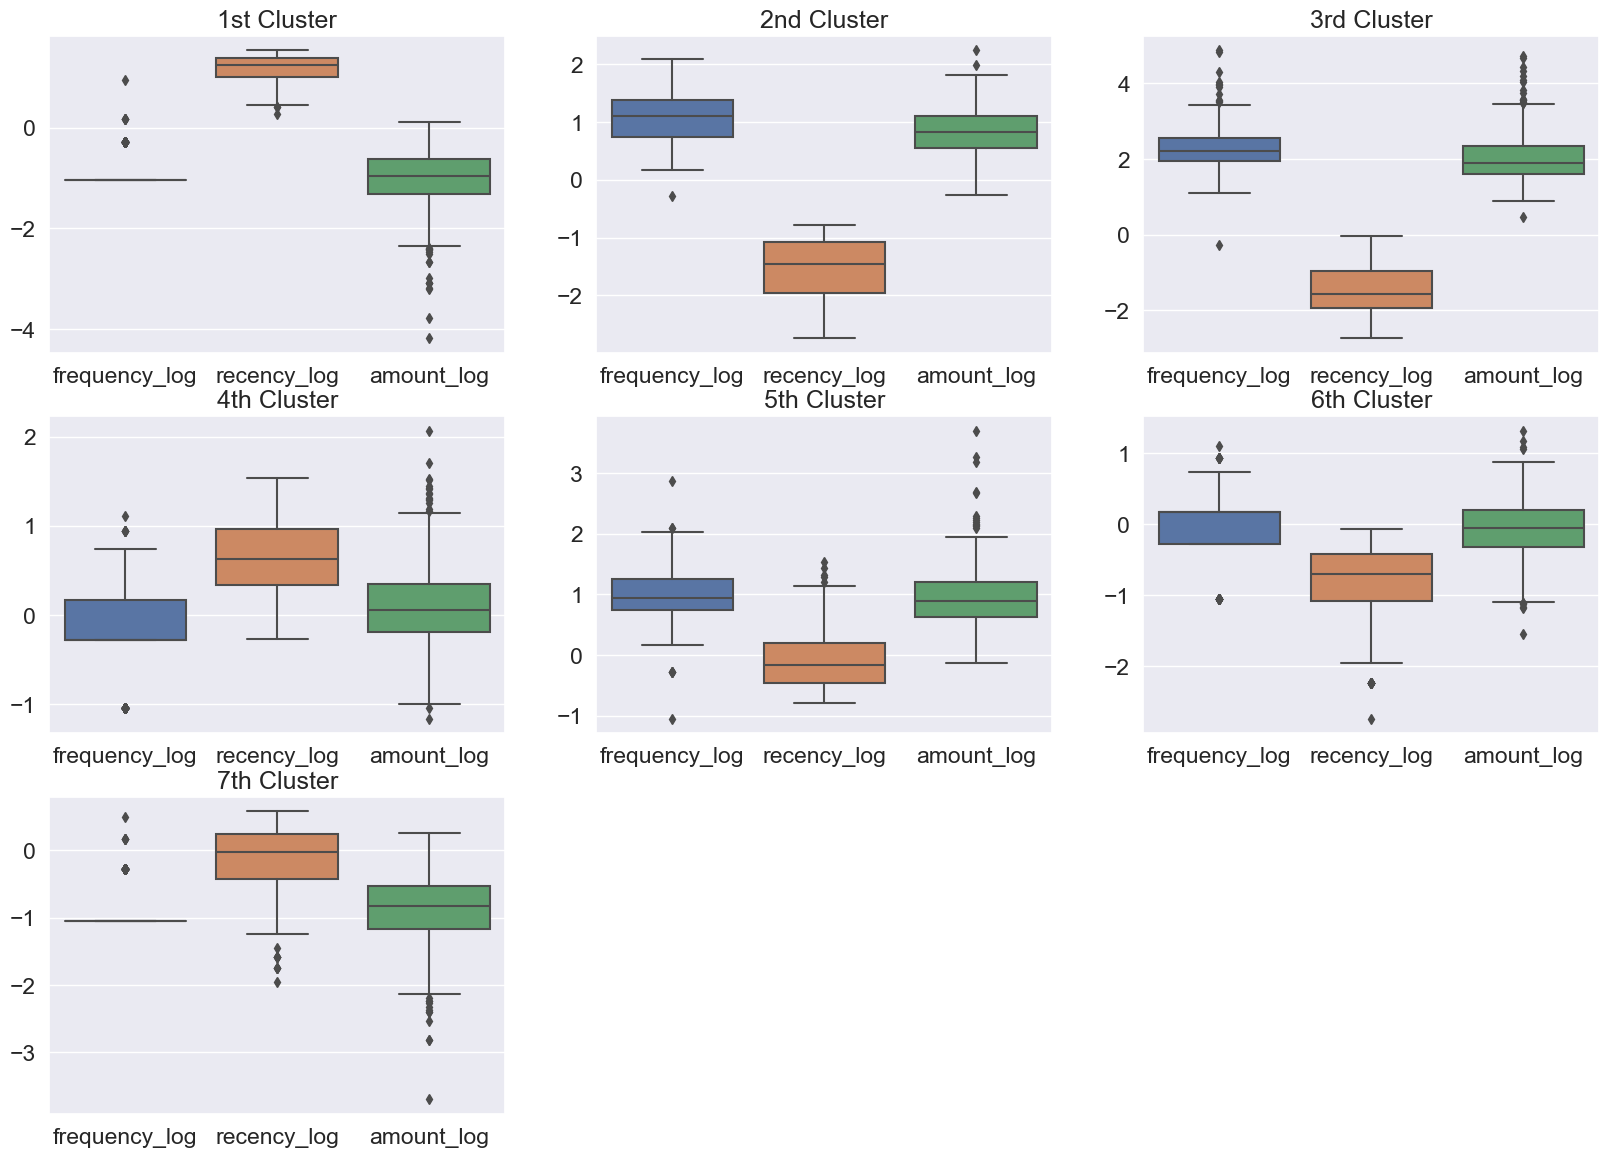

In [71]:
# 7 clusters
fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(331); sns.boxplot(data=c7_0[['frequency_log','recency_log','amount_log']])
ax2 = fig.add_subplot(332); sns.boxplot(data=c7_1[['frequency_log','recency_log','amount_log']])
ax3 = fig.add_subplot(333); sns.boxplot(data=c7_2[['frequency_log','recency_log','amount_log']])
ax4 = fig.add_subplot(334); sns.boxplot(data=c7_3[['frequency_log','recency_log','amount_log']])
ax5 = fig.add_subplot(335); sns.boxplot(data=c7_4[['frequency_log','recency_log','amount_log']])
ax6 = fig.add_subplot(336); sns.boxplot(data=c7_5[['frequency_log','recency_log','amount_log']])
ax7 = fig.add_subplot(337); sns.boxplot(data=c7_6[['frequency_log','recency_log','amount_log']])

#add title
ax1.title.set_text("1st Cluster")
ax2.title.set_text("2nd Cluster")
ax3.title.set_text("3rd Cluster")
ax4.title.set_text("4th Cluster")
ax5.title.set_text("5th Cluster")
ax6.title.set_text("6th Cluster")
ax7.title.set_text("7th Cluster")

#display
plt.show()

Clusters 1 and 2 have near-unique frequency_log values --> represent customers who bought at least once or twice and did not return, as we conclude above, lower outliers at a decent log amount High as well as lower than other clusters also show that the past business period attracted quite a lot of one-time buyers or dolphins.

Cluster 7 has the lowest recency value, appearing outliers in frequency and amount, showing that the current business stage is very developed.

Diversification in cluster 7 is most evident in cluster 6, although the amount of recency is quite high, the amount_log has many outliers on, this cluster represents past whales customers.

#### **Visualize the percentage of customers in each cluster for each K**

Once we have labeled each customer, the next task is quite simple. Now we will understand briefly how the customers in each group are different. If we can visualize this information, we will be able to find differences in customer groups and thereby be able to modify marketing strategies on the basis of those differences.

In [72]:
customer_history_df

,CustomerID,recency,frequency,amount,amount_log,recency_log,frequency_log,clusters_3,clusters_5,clusters_7
0,12346,326,1,77183.60,3.698719,1.435416,-1.048610,2,1,4
1,12347,3,7,4310.00,1.410201,-1.953393,1.111836,1,3,1
2,12348,76,4,1797.24,0.716419,0.382865,0.490522,2,1,4
3,12349,19,1,1757.55,0.698706,-0.619183,-1.048610,2,2,5
4,12350,311,1,334.40,-0.617446,1.401368,-1.048610,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4333,18280,278,1,180.60,-1.106086,1.320288,-1.048610,0,0,0
4334,18281,181,1,80.82,-1.743850,1.010106,-1.048610,0,0,0
4335,18282,8,2,178.05,-1.117365,-1.244425,-0.279044,2,2,5
4336,18283,4,16,2094.88,0.837969,-1.745449,2.029655,1,3,1


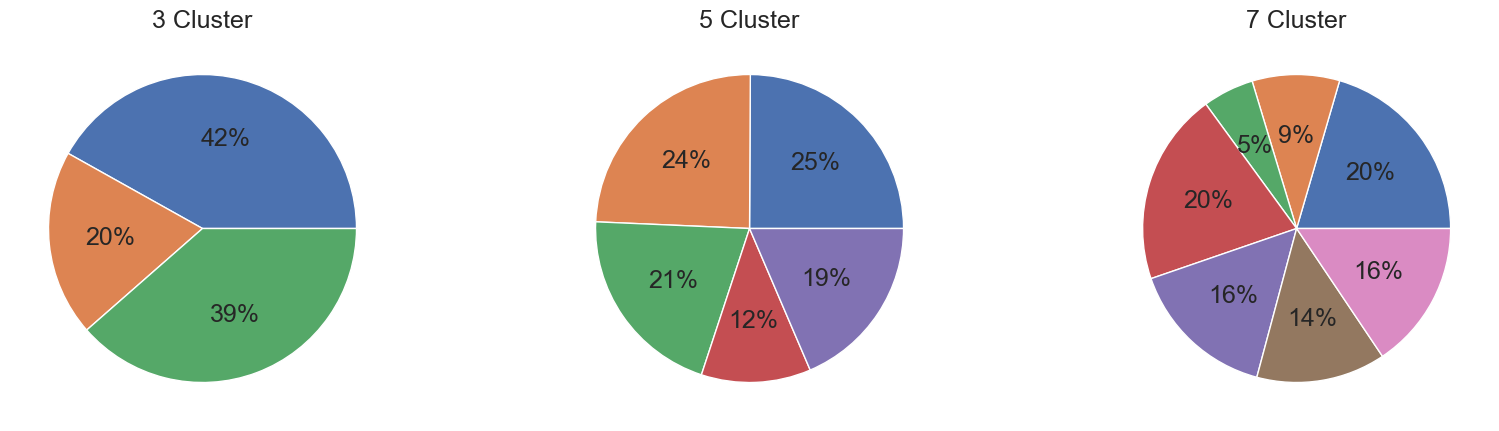

In [73]:
#grouping clusters
c3 = customer_history_df.groupby('clusters_3').agg({"CustomerID":"nunique"})
c5 = customer_history_df.groupby('clusters_5').agg({"CustomerID":"nunique"})
c7 = customer_history_df.groupby('clusters_7').agg({"CustomerID":"nunique"})

# 3 pie charrs
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131); plt.pie(c3['CustomerID'], autopct='%.0f%%')
ax2 = fig.add_subplot(132); plt.pie(c5['CustomerID'], autopct='%.0f%%')
ax3 = fig.add_subplot(133); plt.pie(c7['CustomerID'], autopct='%.0f%%')

#add title
ax1.title.set_text("3 Cluster")
ax2.title.set_text("5 Cluster")
ax3.title.set_text("7 Cluster")

#display
plt.show()

#### **Visualize how much customers have purchased in each cluster for each K, then give comments**

The box plot allows to see the central trend values in each variable. We will remove outliers for each group, as they will hinder a good observation of the central trends of each group. Since the data has only positive values, we will restrict the data so that only data points less than 0.95 percent of the cluster are used. This will give good information about the majority of users in each cluster.

We will use the box chart below to see the ideas raised in the analysis of each cluster for each of the K above:

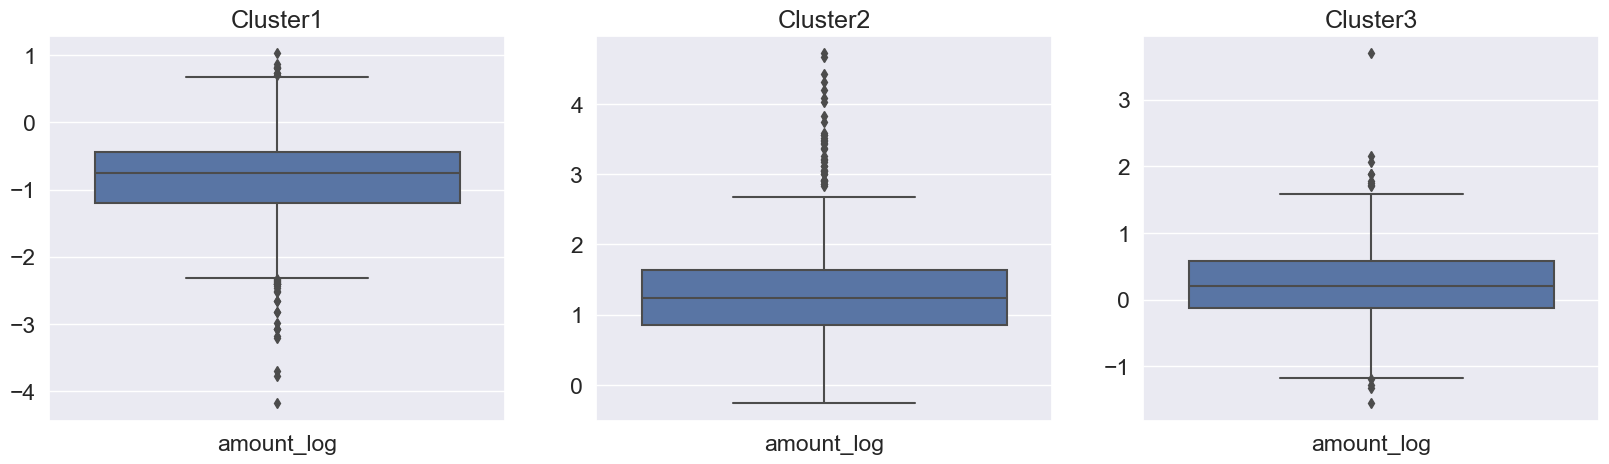

In [74]:
# 3 clusters
fig = plt.figure(figsize=(20,5))

#plotting
ax1 = fig.add_subplot(131); sns.boxplot(data=c3_0[['amount_log']])
ax2 = fig.add_subplot(132); sns.boxplot(data=c3_1[['amount_log']])
ax3 = fig.add_subplot(133); sns.boxplot(data=c3_2[['amount_log']])

#add title
ax1.title.set_text("Cluster1")
ax2.title.set_text("Cluster2")
ax3.title.set_text("Cluster3")

#display
plt.show()

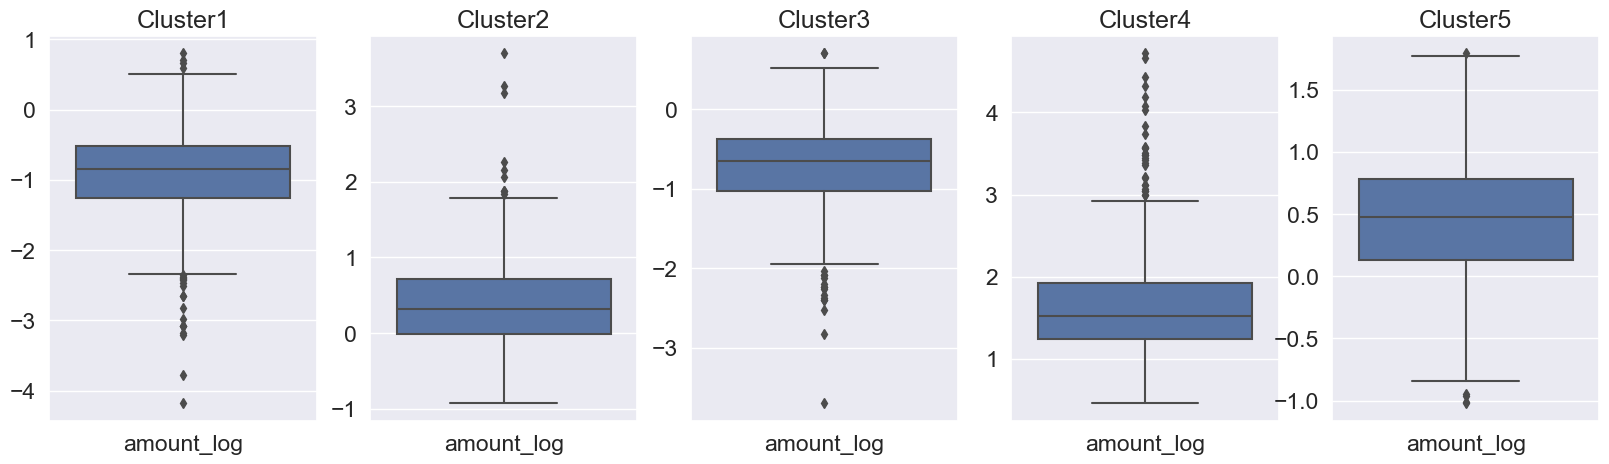

In [75]:
# 5 clusters
fig = plt.figure(figsize=(20,5))

#plotting
ax1 = fig.add_subplot(151); sns.boxplot(data=c5_0[['amount_log']])
ax2 = fig.add_subplot(152); sns.boxplot(data=c5_1[['amount_log']])
ax3 = fig.add_subplot(153); sns.boxplot(data=c5_2[['amount_log']])
ax4 = fig.add_subplot(154); sns.boxplot(data=c5_3[['amount_log']])
ax5 = fig.add_subplot(155); sns.boxplot(data=c5_4[['amount_log']])

#add title
ax1.title.set_text("Cluster1")
ax2.title.set_text("Cluster2")
ax3.title.set_text("Cluster3")
ax4.title.set_text("Cluster4")
ax5.title.set_text("Cluster5")

#display
plt.show()

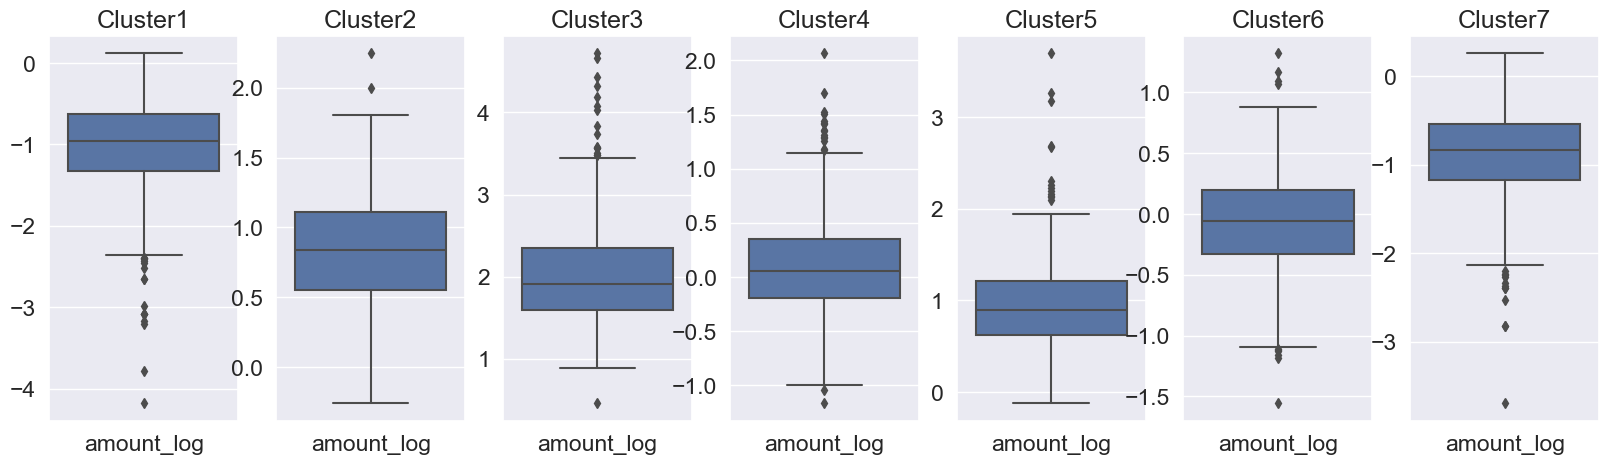

In [76]:
# 7 clusters
fig = plt.figure(figsize=(20,5))

#plotting
ax1 = fig.add_subplot(171); sns.boxplot(data=c7_0[['amount_log']])
ax2 = fig.add_subplot(172); sns.boxplot(data=c7_1[['amount_log']])
ax3 = fig.add_subplot(173); sns.boxplot(data=c7_2[['amount_log']])
ax4 = fig.add_subplot(174); sns.boxplot(data=c7_3[['amount_log']])
ax5 = fig.add_subplot(175); sns.boxplot(data=c7_4[['amount_log']])
ax6 = fig.add_subplot(176); sns.boxplot(data=c7_5[['amount_log']])
ax7 = fig.add_subplot(177); sns.boxplot(data=c7_6[['amount_log']])

#add title
ax1.title.set_text("Cluster1")
ax2.title.set_text("Cluster2")
ax3.title.set_text("Cluster3")
ax4.title.set_text("Cluster4")
ax5.title.set_text("Cluster5")
ax6.title.set_text("Cluster6")
ax7.title.set_text("Cluster7")

#display
plt.show()